In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Cleaning

In [39]:
df.drop(["Id"], axis=1, inplace=True)

In [40]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
df.duplicated().sum()

3

In [42]:
df.drop_duplicates(inplace=True)

## Data Visualization

<Axes: xlabel='Species'>

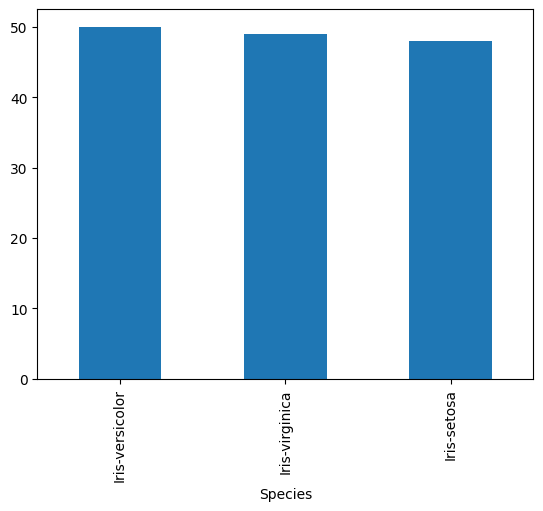

In [43]:
df.Species.value_counts().plot(kind="bar")

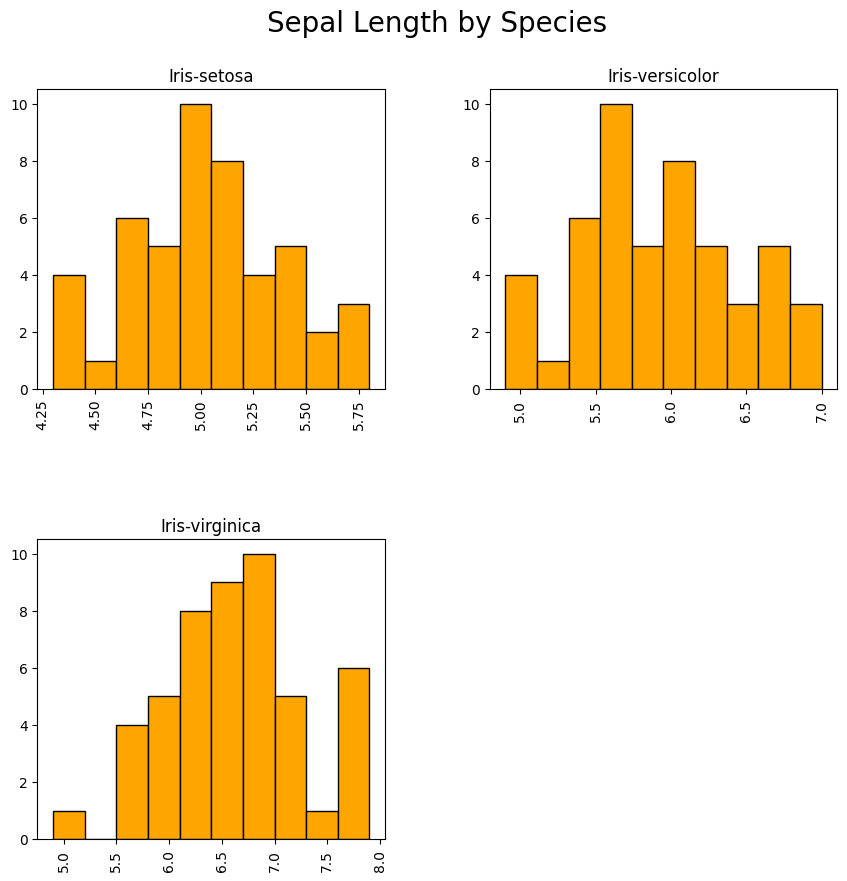

In [44]:
df.hist(column='SepalLengthCm', by='Species', figsize=(10, 10), color='orange',edgecolor='black')
#add titles and labels
plt.suptitle('Sepal Length by Species', fontsize=20)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

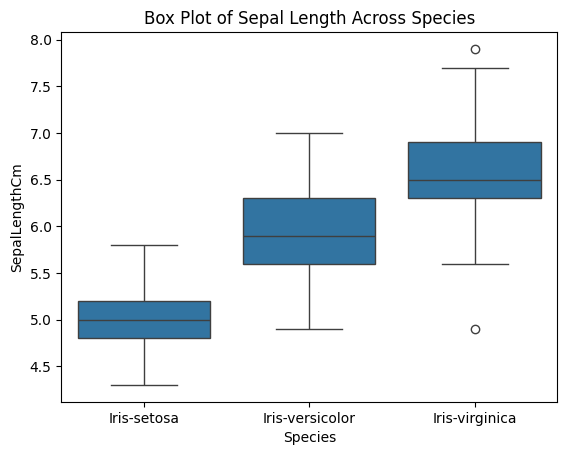

In [45]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Box Plot of Sepal Length Across Species')
plt.show()

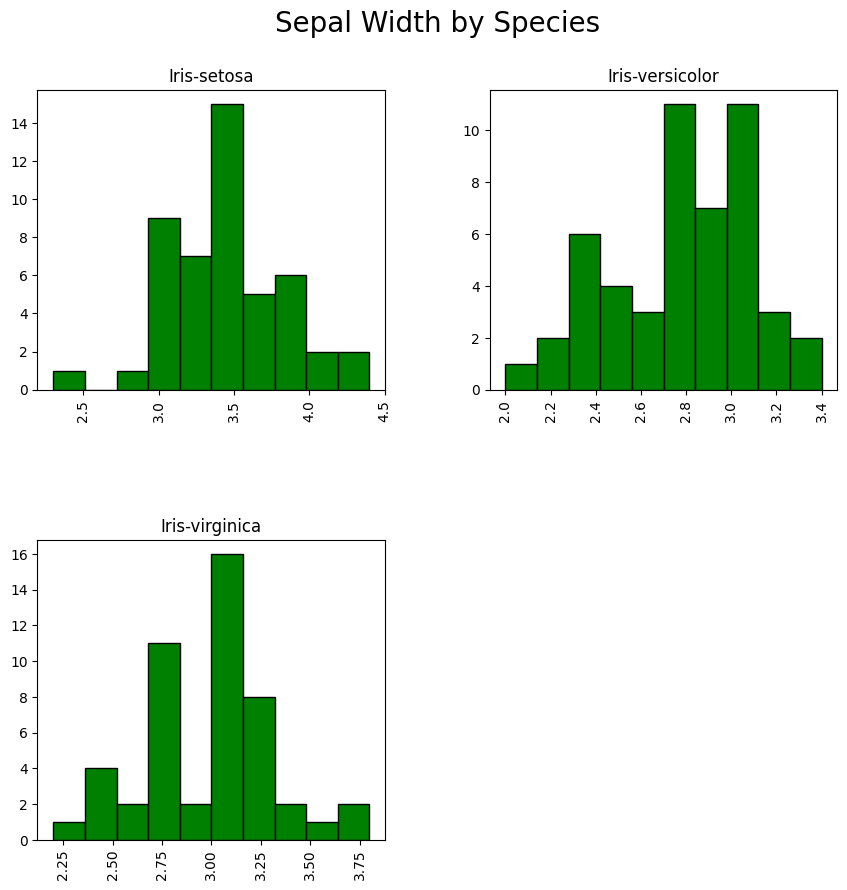

In [46]:
# How does the sepal width vary among the different iris species?
df.hist(column='SepalWidthCm', by='Species', figsize=(10, 10), color='green',edgecolor='black')
#add titles and labels
plt.suptitle('Sepal Width by Species', fontsize=20)
plt.xlabel('Width', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

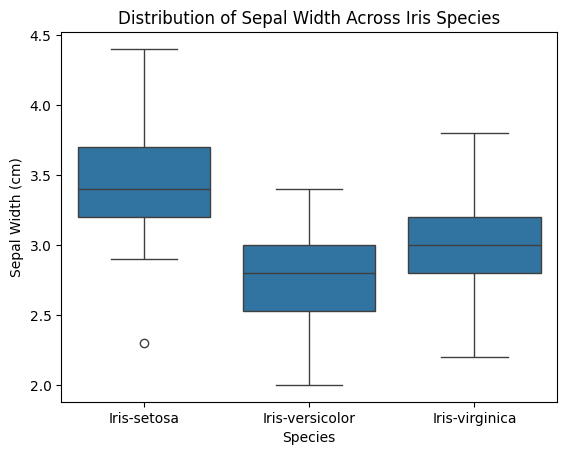

In [47]:
# Is there a noticeable difference in sepal width between the species?
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Distribution of Sepal Width Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

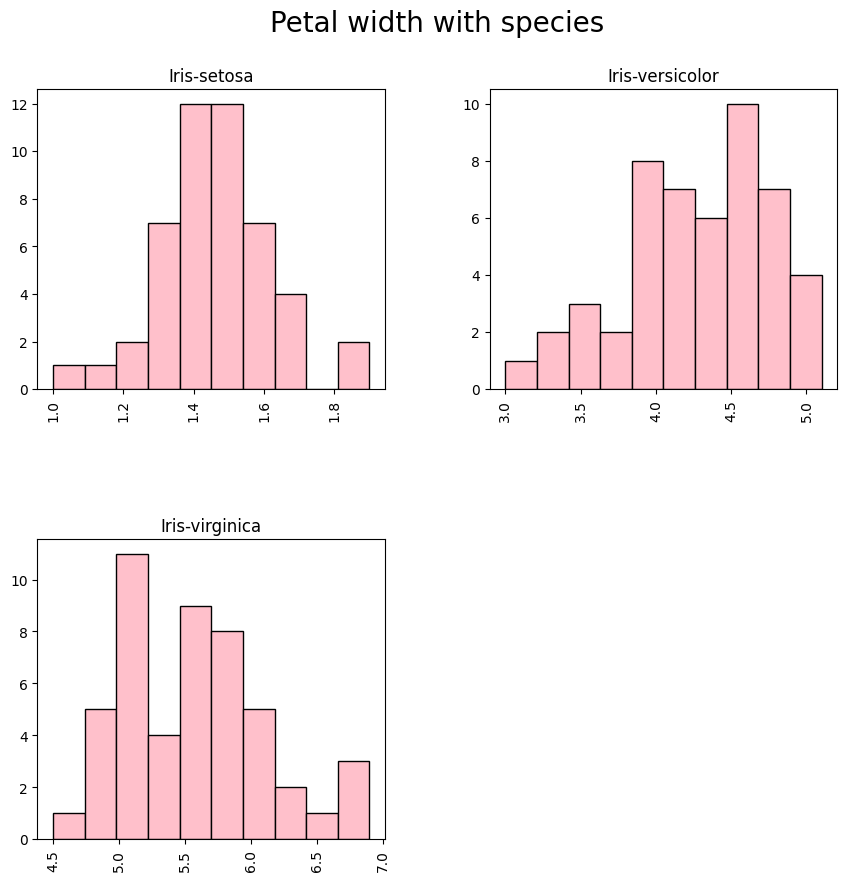

In [48]:
df.hist(column='PetalLengthCm', by='Species', figsize=(10,10),color='pink',edgecolor='black')
plt.suptitle('Petal width with species', fontsize=20)
plt.xlabel('Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

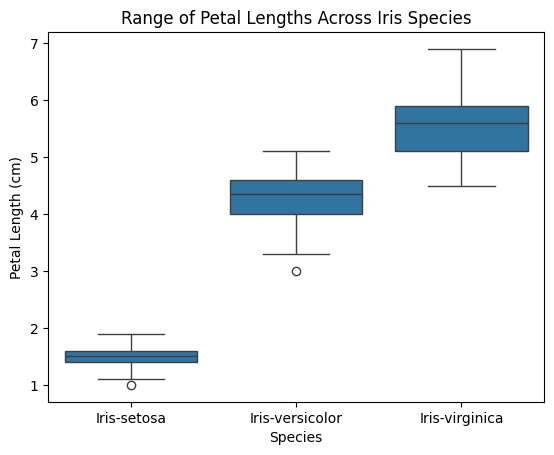

In [49]:
#What is the range of petal lengths for each species?
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Range of Petal Lengths Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

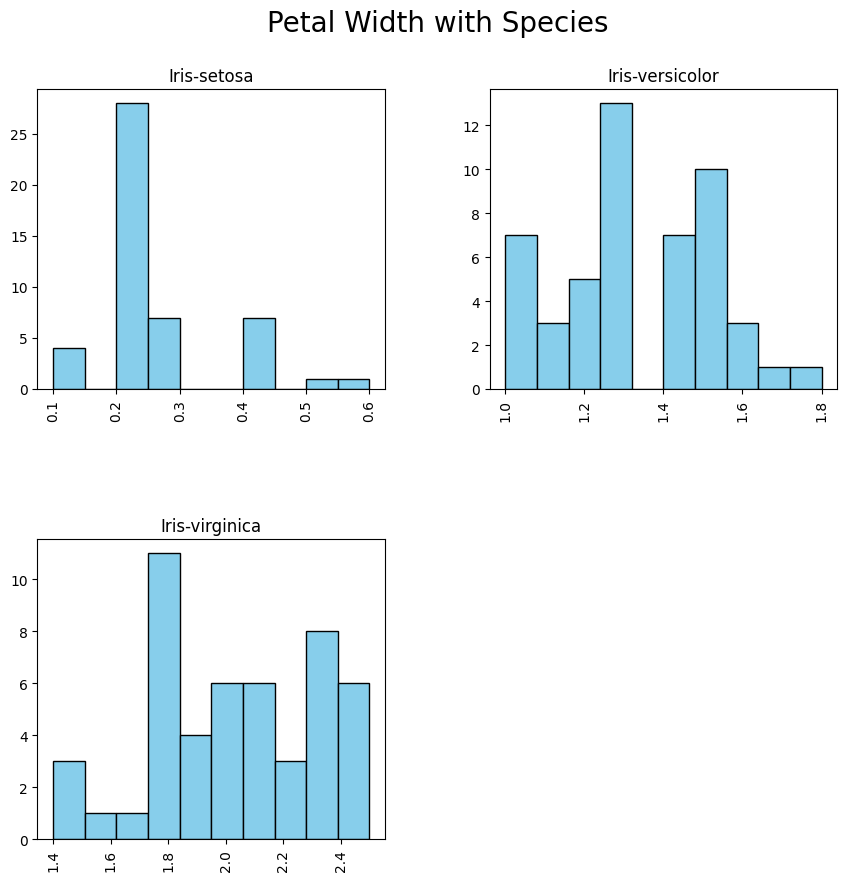

In [50]:
df.hist(column='PetalWidthCm',by='Species',figsize=(10,10),color='skyblue',edgecolor='black')
plt.suptitle("Petal Width with Species",fontsize=20)
plt.xlabel('Width',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

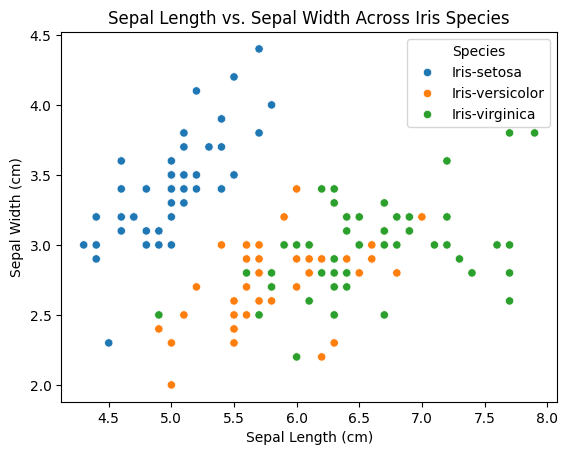

In [51]:
# Is there a correlation between sepal length and sepal width?
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs. Sepal Width Across Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

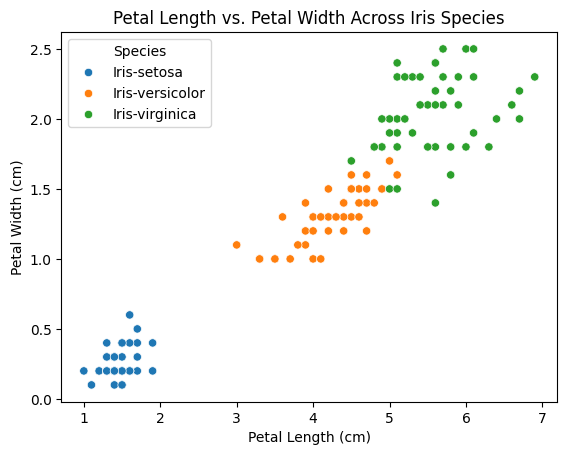

In [52]:
#* Explore the relationship between petal length and petal width of various species.
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Petal Length vs. Petal Width Across Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

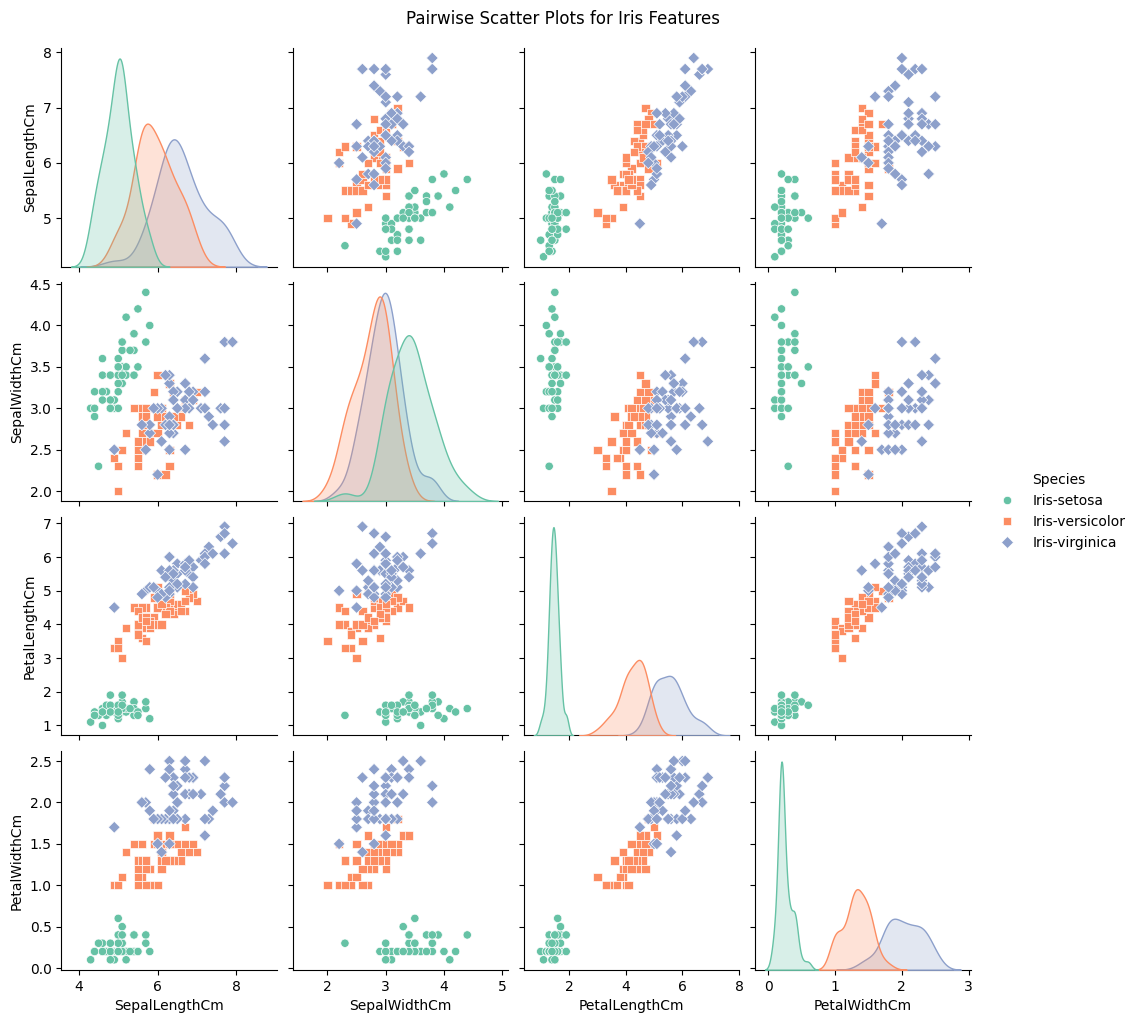

In [53]:
# Create scatter plots for each pair of features, color-coding points by species.
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette='Set2')
plt.suptitle('Pairwise Scatter Plots for Iris Features', y=1.02)
plt.show()

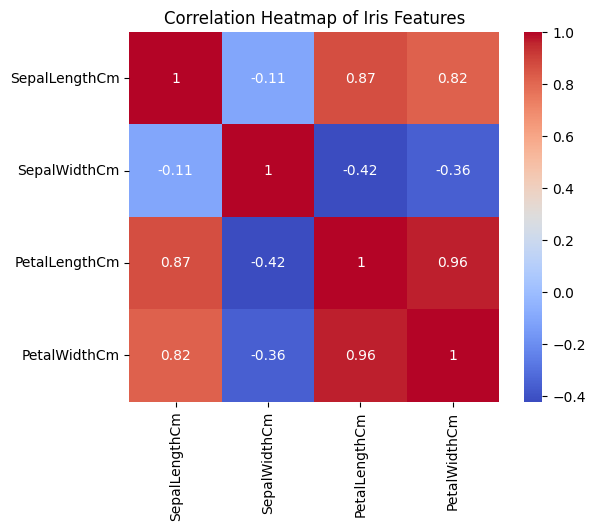

In [54]:
numeric_df = df.drop(['Species'], axis=1)
correlation_matrix =numeric_df.corr()
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

## Data balancing

In [55]:
x= df.drop("Species", axis=1)
y= df.Species

In [56]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_new, y_new = sampler.fit_resample(x,y)

<Axes: xlabel='Species'>

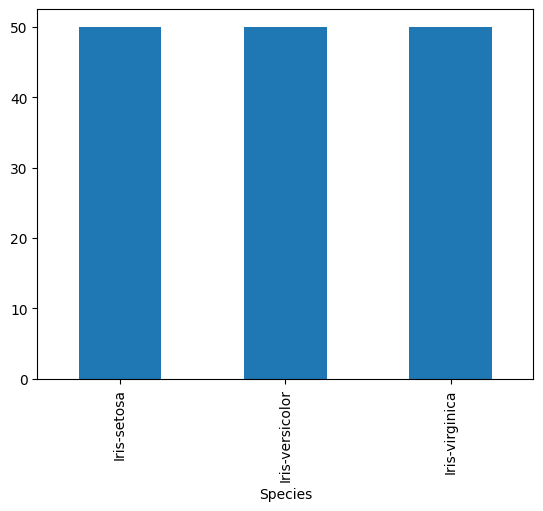

In [57]:
y_new.value_counts().plot(kind="bar")

## Train-Test-Split

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

## Modeling

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [63]:
models = [
 LogisticRegression(),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 MultinomialNB(),
 MLPClassifier()
 ]

In [64]:
for mdl in models:
 mdl.fit(x_train, y_train)
 y_pred = mdl.predict(x_test)
 train_score= mdl.score(x_train,y_train)
 test_score= mdl.score(x_test,y_test)
 acc= accuracy_score(y_test,y_pred)
 name= type(mdl).__name__
 print(name)
 print(train_score)
 print(test_score)
 print(acc)
 print(classification_report(y_test, y_pred))
 print(confusion_matrix(y_test, y_pred))
 print("++++++++++++++++++++++++++++++++++++++++++++++++")

LogisticRegression
0.9833333333333333
0.9333333333333333
0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30

[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
++++++++++++++++++++++++++++++++++++++++++++++++
SVC
0.9833333333333333
0.9666666666666667
0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
